In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [13]:
data = pd.read_csv("ecommerce_product_dataset.csv")

In [75]:
data.head()
#data.dtypes

,ProductID,ProductName,Category,Price,Rating,NumReviews,StockQuantity,Discount,Sales,DateAdded,City
0,1,Headphones,Electronics,400.31,1.7,3772,20,0.08,466,2023-11-10,Albuquerque
1,2,Headphones,Electronics,235.03,2.3,2919,663,0.33,1332,2023-09-28,Queens
2,3,Smartwatch,Electronics,417.90,1.8,1184,459,0.31,252,2023-10-20,Austin
3,4,Smartphone,Electronics,152.70,3.4,2047,475,0.49,1806,2023-12-05,Dallas
4,5,Laptop,Electronics,394.74,1.8,1267,831,0.23,1508,2023-08-10,Tucson


In [56]:
data['DateAdded'] = pd.to_datetime(data['DateAdded'])

In [101]:
data.dtypes
data.isna().sum()
no_of_Category = data['Category'].value_counts()
no_of_Category
products = data.groupby(data['Category'])['ProductName'].unique().apply(list).reset_index()
products

,Category,ProductName
0,Art and crafting materials,"[Sketchbook, Brushes, Paint Set, Canvas]"
1,Bath and body,"[Body Lotion, Body Scrub, Bath Salts, Shower Gel]"
2,Bedsheets,"[Silk Sheets, Linen Sheets, Bamboo Sheets, Cot..."
3,Bicycles,"[Road Bike, Mountain Bike, Hybrid Bike, Electr..."
4,Blankets,"[Throw Blanket, Electric Blanket, Fleece Blank..."
5,Books,"[Biography, Fantasy Book, Science Book, Novel]"
6,Candles,"[Soy Candle, Beeswax Candle, Scented Candle, P..."
7,Clothing,"[Jacket, Sweater, T-Shirt, Jeans]"
8,Coats and jackets,"[Denim Jacket, Rain Jacket, Leather Jacket, Wi..."
9,Cookware,"[Dutch Oven, Frying Pan, Grill Pan, Saucepan]"


In [102]:
sales_per_month = data.groupby(data['DateAdded'].dt.to_period('M')).agg({'Sales': 'sum'}).reset_index()
sales_per_month.head()

,DateAdded,Sales
0,2023-06,33255
1,2023-07,102359
2,2023-08,94512
3,2023-09,86808
4,2023-10,78685


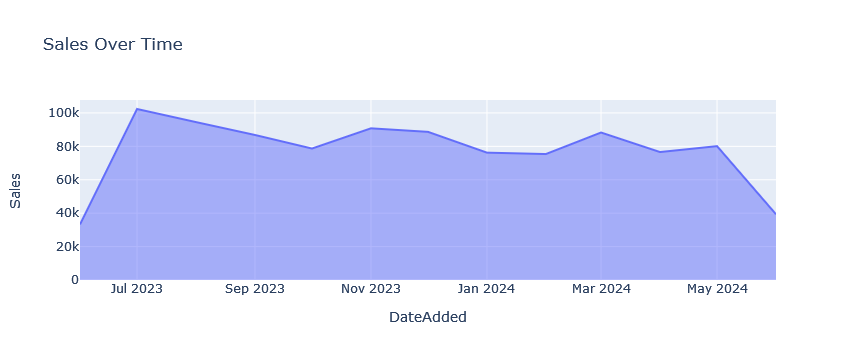

In [74]:
import plotly.express as px
sales_per_month['DateAdded'] = sales_per_month['DateAdded'].dt.to_timestamp()
fig = px.area(sales_per_month, x='DateAdded', y='Sales', title='Sales Over Time')
fig.show()


<Axes: xlabel='Sales', ylabel='Discount'>

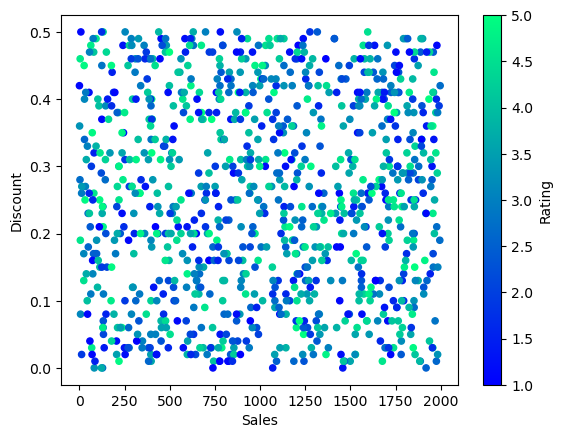

In [107]:

data.plot.scatter('Sales', 'Discount', c='Rating', colormap='winter')

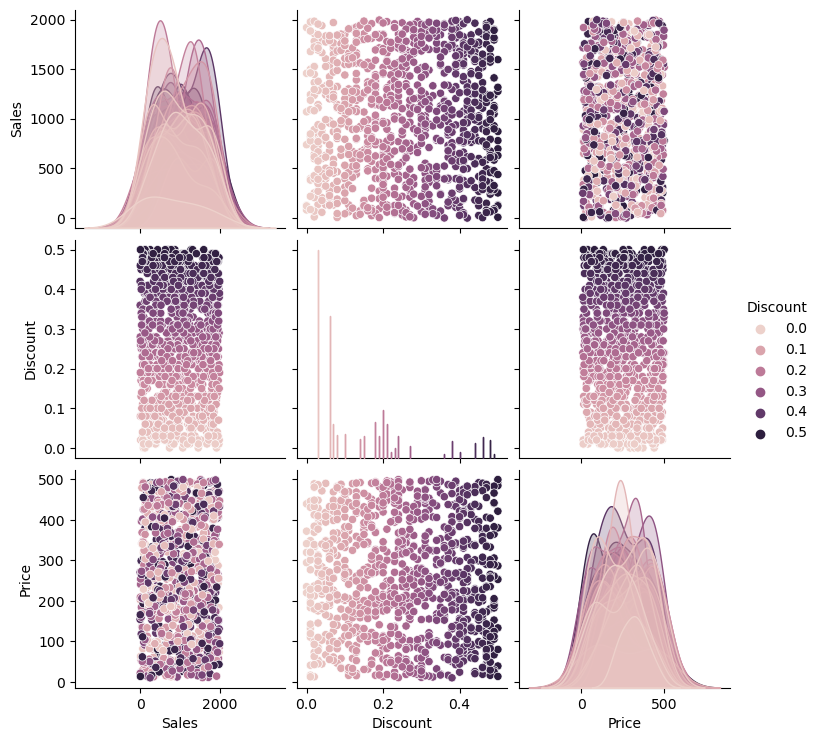

In [110]:

sns.pairplot(data, vars=[ 'Sales', 'Discount', 'Price' ], hue ="Discount");